In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
dataset = pd.read_csv("heart_2020_cleaned.csv")
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = dataset[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
  dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [11]:
Y=dataset['HeartDisease']
X=dataset.drop(['HeartDisease'],axis=1)
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [12]:
Y.value_counts() 

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [13]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k=14)
fit = test.fit(X, Y)
X=test.fit_transform(X, Y)

In [14]:
from imblearn.over_sampling import RandomOverSampler

# Assuming X and Y are your original feature matrix and target variable
smote = RandomOverSampler(sampling_strategy=1)
x, y = smote.fit_resample(X, Y)

print(f'x_shape: {x.shape}\ny_shape: {y.shape}')

x_shape: (584844, 14)
y_shape: (584844,)


In [15]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [16]:
y.value_counts()

HeartDisease
0    292422
1    292422
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x = scl.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 10)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(x_test)

# Print accuracy
print("KNN accuracy (in %):", metrics.accuracy_score(y_test, y_pred_knn) * 100)

# Print classification report
print(classification_report(y_test, y_pred_knn))



KNN accuracy (in %): 87.7209208337867
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     64293
           1       0.82      0.97      0.89     64373

    accuracy                           0.88    128666
   macro avg       0.89      0.88      0.88    128666
weighted avg       0.89      0.88      0.88    128666



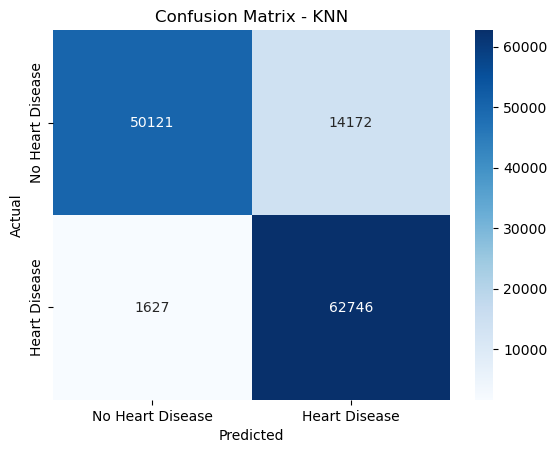

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix using a heatmap
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(x_test)

# Print accuracy
print("Decision Tree accuracy (in %):", metrics.accuracy_score(y_test, y_pred_dt) * 100)

# Print classification report
print(classification_report(y_test, y_pred_dt))



Decision Tree accuracy (in %): 93.09685542412137
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     64293
           1       0.89      0.98      0.93     64373

    accuracy                           0.93    128666
   macro avg       0.94      0.93      0.93    128666
weighted avg       0.94      0.93      0.93    128666



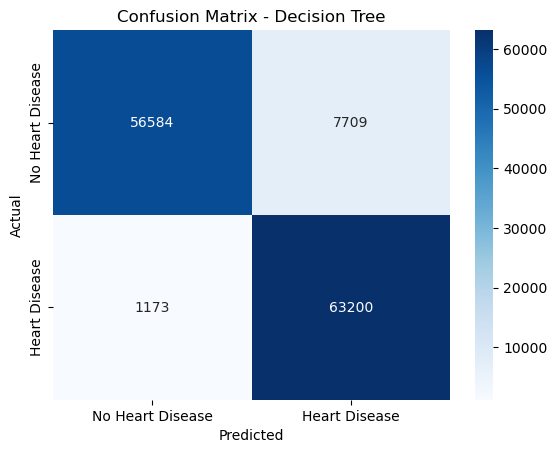

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix using a heatmap
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf=RandomForestClassifier( n_estimators = 50 )
rf.fit(x_train , y_train)

y_pred_2 = rf.predict(x_test)

from sklearn import metrics
print("rf accuracy(in %):", metrics.accuracy_score(y_test, y_pred_2)*100)

print(classification_report(y_test,y_pred_2))



rf accuracy(in %): 93.7279467769263
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     64293
           1       0.90      0.98      0.94     64373

    accuracy                           0.94    128666
   macro avg       0.94      0.94      0.94    128666
weighted avg       0.94      0.94      0.94    128666



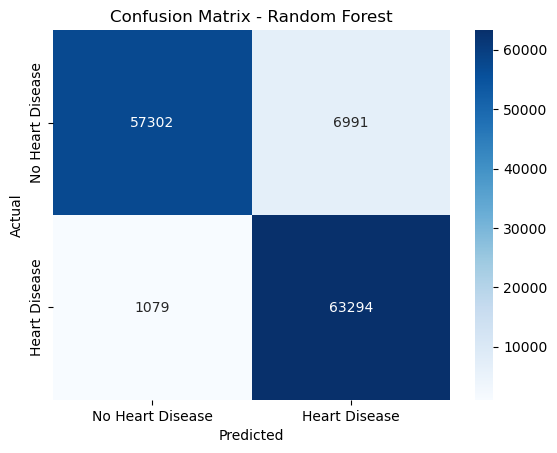

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_2)

# Display confusion matrix using a heatmap
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
